In [ ]:
#Import the required librarys 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#load data
from google.colab import files
uploaded = files.upload()

Saving 2_car_procesed.csv to 2_car_procesed.csv


In [ ]:
df= pd.read_csv('2_car_procesed.csv')
df.head(1)

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers
0,1,1.0,Tata,Nano Genx,236447,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",NO,NO,NO,NO,38PS@55rpm,51Nm@4rpm,4.0,Not on offer,2 years /75 Kms (years/distance whichever come...,NO,Front,4 meter,NO,NO,NO,NO,NO,NO,NO


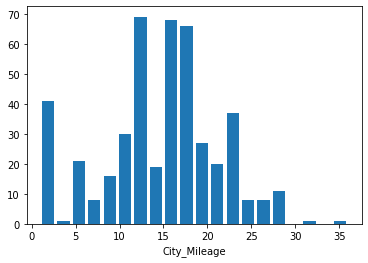

In [ ]:
# 
plt.hist(df.City_Mileage,bins=20 ,rwidth=0.8)
plt.xlabel('City_Mileage')

plt.show()

In [ ]:
#remove by direct value  
#df[(df.Doors>upper_limit)|(df.Doors<lower_limit)]
#df_removed_outlier[df_removed_outlier(['City_Mileage']>5)&(['City_Mileage']<30)]
df_removed_outlier=df[(df.City_Mileage>5)&(df.City_Mileage<30)]

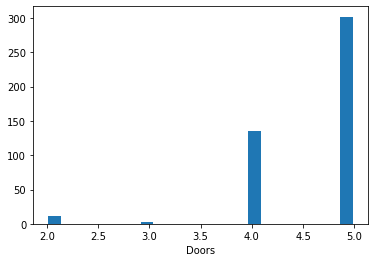

In [ ]:
#Removing 
plt.hist(df.Doors,bins=20 ,rwidth=0.8)
plt.xlabel('Doors')
plt.show()

In [ ]:
#removeing the outliers Using normal distribution /bel-curve
upper_limit=df_removed_outlier.Doors.mean()+3*df_removed_outlier.Doors.std()
lower_limit= df_removed_outlier.Doors.mean()-3*df_removed_outlier.Doors.std()
df_removed_outlier[(df_removed_outlier.Doors>upper_limit)|(df_removed_outlier.Doors<lower_limit)]

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers
197,487,488.0,Maruti Suzuki,Gypsy,794300,4.0,BS III,Petrol,4.0,1875.0,154.0,3.0,10,Solid Disc,Drum,Leaf spring with Double action damper,Leaf spring with Double action damper,NO,NO,NO,NO,8PS@6rpm,13Nm@45RPM,8.0,Not on offer,2 years /4 Kms (years/distance whichever comes...,NO,Not on offer,5.1 meter,NO,NO,NO,NO,NO,NO,NO
198,488,489.0,Maruti Suzuki,Gypsy,637343,4.0,BS III,Petrol,4.0,1845.0,154.0,3.0,10,Solid Disc,Drum,Rear Leaf spring with Double action damper,Rear Leaf spring with Double action damper,NO,NO,NO,NO,8PS@6rpm,13Nm@45RPM,8.0,Not on offer,2 years /4 Kms (years/distance whichever comes...,NO,Not on offer,5.1 meter,NO,NO,NO,NO,NO,NO,NO
234,631,632.0,Force,Gurkha,999000,4.0,BS IV,Diesel,63.0,255.0,179.0,3.0,14,Ventilated Disc,Drum,Independent with Coil Spring mounted on Struts...,"Multi Link with Pan Hard Rod and Coil Springs,...",Yes,Only Front Windows,NO,NO,85PS@32rpm,23Nm@14-24rpm,5.0,Not on offer,"3 Years/1,, Kms (Whichever comes earlier)",NO,Not on offer,5.65 meter,NO,NO,NO,NO,NO,NO,NO
390,1048,152.0,Bmw,M4,12500000,4.0,BS IV,Diesel,6.0,1383.0,187.0,2.0,7,Ventilated Disc,Ventilated Disc,Adaptive M Suspension,Adaptive M Suspension,Electric Power,All Windows,Yes,Smart Key,431PS@73RPM,55Nm@185-55rpm,4.0,DVD Player with USB & Aux-in,2 years / Unlimited Kms,Yes,Front,6.1 meter,NO,NO,Yes,Front and rear sensors with camera,Yes,Yes,Yes
431,1159,1163.0,Jaguar,F-Type,6440000,4.0,BS IV,Diesel,72.0,138.0,242.0,2.0,7,Solid Disc,Solid Disc,Sports Suspension with Adaptive Damping,Sports Suspension with Adaptive Damping,Hydraulic Power,Only Front Windows,NO,NO,55PS@65RPM,68Nm@25RPM,2.0,DVD Player with USB & Aux-in,"3 Years/1,, Kms (Whichever comes earlier)",NO,NO,1.66 meter,NO,NO,NO,Rear sensors,NO,Yes,Yes


In [ ]:
df_removed_outlier[(df_removed_outlier.Doors<upper_limit)&(df_removed_outlier.Doors>lower_limit)]

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers
0,1,1.0,Tata,Nano Genx,236447,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",NO,NO,NO,NO,38PS@55rpm,51Nm@4rpm,4.0,Not on offer,2 years /75 Kms (years/distance whichever come...,NO,Front,4 meter,NO,NO,NO,NO,NO,NO,NO
2,3,3.0,Tata,Nano Genx,334768,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,Only Front Windows,NO,Remote,38PS@55rpm,51Nm@4rpm,4.0,CD Player with USB & Aux-in,2 years /75 Kms (years/distance whichever come...,Yes,Front,4 meter,NO,NO,NO,NO,NO,NO,NO
3,4,4.0,Tata,Nano Genx,272223,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,NO,NO,NO,38PS@55rpm,51Nm@4rpm,4.0,Not on offer,2 years /75 Kms (years/distance whichever come...,NO,Front,4 meter,NO,NO,NO,NO,NO,NO,NO
4,5,5.0,Tata,Nano Genx,314815,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,NO,NO,NO,38PS@55rpm,51Nm@4rpm,4.0,Not on offer,2 years /75 Kms (years/distance whichever come...,NO,Not on offer,4 meter,NO,NO,NO,NO,NO,NO,NO
5,6,6.0,Datsun,Redi-Go,279650,4.0,BS IV,Petrol,28.0,1541.0,156.0,5.0,21,Ventilated Disc,Drum,Double Pivot Arm,H-type Torsion Beam,NO,NO,NO,NO,54PS@5678rpm,72Nm@4386rpm,5.0,Not on offer,2 years / Unlimited Kms,NO,Not on offer,4.7 meter,NO,NO,Yes,NO,NO,NO,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1266,127.0,Honda,City,1065900,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Remote,1PS@36rpm,2Nm@175rpm,5.0,CD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO
448,1267,1271.0,Honda,City,1182000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO
449,1268,1272.0,Honda,City,1312000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Rear sensors with camera,NO,Yes,Yes
450,1269,1273.0,Honda,City,1111000,4.0,BS 6,Diesel,4.0,1495.0,1695.0,4.0,18,Ventilated Disc,Drum,"McPherson strut,coil spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,119PS@66rpm,145Nm@46rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Rear sensors with camera,NO,Yes,NO


In [ ]:
#stroing the clean data in new file
df_removed_outlier=df_removed_outlier[(df_removed_outlier.Doors<upper_limit)&(df_removed_outlier.Doors>lower_limit)]
df_removed_outlier.shape

(388, 36)

In [ ]:
df_removed_outlier.Doors.mean()

4.701030927835052

In [ ]:
df.Doors.mean()

4.6084070796460175

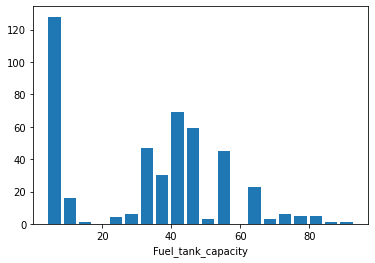

In [ ]:
#Remove te outlayears of Fuel_tank_capacity using belcurve  
plt.hist(df.Fuel_Tank_Capacity,bins=20 ,rwidth=0.8)
plt.xlabel('Fuel_tank_capacity')
plt.show()

In [ ]:
#outliers removed by z_score
# Z= (x-Mean)/SD
df_removed_outlier['zscore']= (df_removed_outlier.Fuel_Tank_Capacity - df_removed_outlier.Fuel_Tank_Capacity.mean())/df_removed_outlier.Fuel_Tank_Capacity.std()

In [ ]:
df_removed_outlier.shape

(388, 37)

In [ ]:
df_removed_outlier[df_removed_outlier['zscore']>2.4]

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers,zscore
155,311,312.0,Toyota,Land Cruiser Prado,8690000,4.0,BS IV,Diesel,87.0,188.0,1885.0,5.0,7,Ventilated Disc,Ventilated Disc,Double wishbone,4-Link with Air Spring,Electric Power,All Windows,"Yes, with memory",Smart Key,173PS@34rpm,41Nm@16-28rpm,7.0,DVD Player with USB & Aux-in,3 years /1 Kms (years/distance whichever comes...,Yes,Front & Rear,5.8 meter,NO,NO,Yes,Front and rear sensors with camera,Yes,Yes,Yes,2.538708


In [ ]:
df_removed_outlier=df_removed_outlier[(df_removed_outlier.zscore<2.4)]

In [ ]:
df.City_Mileage.mean()

14.639380530973451

In [ ]:
df_removed_outlier.City_Mileage.mean()

16.4031007751938

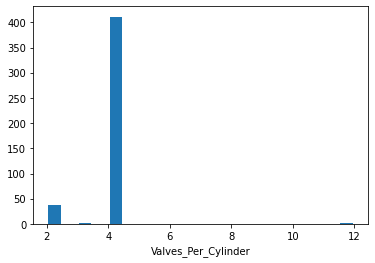

In [ ]:
plt.hist(df.Valves_Per_Cylinder,bins=20 ,rwidth=0.8)
plt.xlabel('Valves_Per_Cylinder')

plt.show()

In [ ]:
df_removed_outlier=df_removed_outlier[(df_removed_outlier.Valves_Per_Cylinder<6)]

#df_removed_outlier=df_removed_outlier[(df_removed_outlier.Valves_Per_Cylinder<6)]

In [ ]:
df_removed_outlier.shape

(386, 37)

In [ ]:
df_removed_outlier[df_removed_outlier['Power_Steering']!="NO"]

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers,zscore
2,3,3.0,Tata,Nano Genx,334768,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,Only Front Windows,NO,Remote,38PS@55rpm,51Nm@4rpm,4.0,CD Player with USB & Aux-in,2 years /75 Kms (years/distance whichever come...,Yes,Front,4 meter,NO,NO,NO,NO,NO,NO,NO,-0.447203
3,4,4.0,Tata,Nano Genx,272223,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,NO,NO,NO,38PS@55rpm,51Nm@4rpm,4.0,Not on offer,2 years /75 Kms (years/distance whichever come...,NO,Front,4 meter,NO,NO,NO,NO,NO,NO,NO,-0.447203
4,5,5.0,Tata,Nano Genx,314815,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,NO,NO,NO,38PS@55rpm,51Nm@4rpm,4.0,Not on offer,2 years /75 Kms (years/distance whichever come...,NO,Not on offer,4 meter,NO,NO,NO,NO,NO,NO,NO,-0.447203
6,7,7.0,Datsun,Redi-Go,351832,4.0,BS IV,Petrol,28.0,1541.0,156.0,5.0,21,Ventilated Disc,Drum,Double Pivot Arm,H-type Torsion Beam,Electric Power,Only Front Windows,NO,NO,54PS@5678rpm,72Nm@4386rpm,5.0,CD Player with USB & Aux-in,2 years / Unlimited Kms,Yes,Front,4.7 meter,NO,NO,NO,NO,NO,NO,NO,-0.257621
7,8,8.0,Datsun,Redi-Go,333419,4.0,BS IV,Petrol,28.0,1541.0,156.0,5.0,21,Ventilated Disc,Drum,Double Pivot Arm,H-type Torsion Beam,Electric Power,NO,NO,NO,54PS@5678rpm,72Nm@4386rpm,5.0,Not on offer,2 years / Unlimited Kms,NO,Front,4.7 meter,NO,NO,NO,NO,NO,NO,NO,-0.257621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1266,127.0,Honda,City,1065900,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Remote,1PS@36rpm,2Nm@175rpm,5.0,CD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,-1.395111
448,1267,1271.0,Honda,City,1182000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,-1.395111
449,1268,1272.0,Honda,City,1312000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Rear sensors with camera,NO,Yes,Yes,-1.395111
450,1269,1273.0,Honda,City,1111000,4.0,BS 6,Diesel,4.0,1495.0,1695.0,4.0,18,Ventilated Disc,Drum,"McPherson strut,coil spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,119PS@66rpm,145Nm@46rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Rear sensors with camera,NO,Yes,NO,-1.395111


In [ ]:
df_removed_outlier=df_removed_outlier[df_removed_outlier['Power_Steering']!="NO"]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


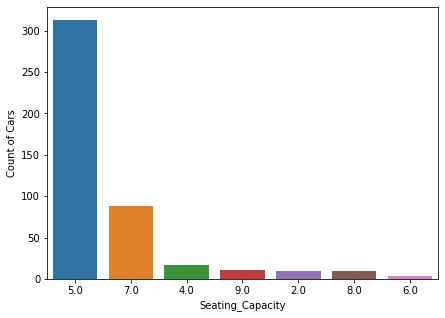

<Figure size 432x288 with 0 Axes>

In [ ]:
#Seating_Capacity
fig, ax = plt.subplots(figsize = (7,5))
plt1 = sns.countplot(df['Seating_Capacity'], order=pd.value_counts(df['Seating_Capacity']).index,)
plt1.set(xlabel = 'Seating_Capacity', ylabel= 'Count of Cars')

plt.show()
plt.tight_layout()

In [ ]:
df_removed_outlier[(df_removed_outlier.Seating_Capacity==6)]

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers,zscore
176,401,42.0,Mahindra,Kuv1 Nxt,754548,4.0,BS IV,Diesel,35.0,1655.0,1735.0,5.0,15,Ventilated Disc,Drum,Independent McPherson struts with offset coil ...,"Semi-independent, Twist Beam with Coil Springs...",Electric Power,All Windows,NO,Remote,82PS@55RPM,115NM@35-36RPM,6.0,CD Player with USB & Aux-in,"2 years /1,, Kms (years/distance whichever com...",Yes,Front & Rear,5.5 meter,NO,NO,Yes,NO,NO,Yes,NO,0.074147
177,402,43.0,Mahindra,Kuv1 Nxt,693550,4.0,BS IV,Petrol,35.0,1655.0,1735.0,5.0,22,Ventilated Disc,Drum,Independent McPherson struts with offset coil ...,"Semi-independent, Twist Beam with Coil Springs...",Electric Power,All Windows,NO,Remote,77PS@375RPM,19NM@175-225RPM,6.0,CD Player with USB & Aux-in,"2 years /1,, Kms (years/distance whichever com...",Yes,Front & Rear,5.5 meter,NO,NO,Yes,NO,NO,Yes,NO,0.074147
178,403,44.0,Mahindra,Kuv1 Nxt,787304,4.0,BS IV,Diesel,35.0,1655.0,1735.0,5.0,15,Ventilated Disc,Drum,Independent McPherson struts with offset coil ...,"Semi-independent, Twist Beam with Coil Springs...",Electric Power,All Windows,NO,Remote,82PS@55RPM,115NM@35-36RPM,6.0,CD Player with USB & Aux-in,"2 years /1,, Kms (years/distance whichever com...",Yes,Front & Rear,5.5 meter,NO,NO,Yes,NO,NO,Yes,NO,0.074147
179,404,45.0,Mahindra,Kuv1 Nxt,701045,4.0,BS IV,Petrol,35.0,1655.0,1735.0,5.0,22,Ventilated Disc,Drum,Independent McPherson struts with offset coil ...,"Semi-independent, Twist Beam with Coil Springs...",Electric Power,All Windows,NO,Remote,77PS@375RPM,19NM@175-225RPM,6.0,CD Player with USB & Aux-in,"2 years /1,, Kms (years/distance whichever com...",Yes,Front & Rear,5.5 meter,NO,NO,Yes,NO,NO,Yes,NO,0.074147


In [ ]:
df_removed_outlier[(df_removed_outlier.Seating_Capacity<8)&(df_removed_outlier.Doors>3)&(df_removed_outlier.Doors!=6)]

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers,zscore
2,3,3.0,Tata,Nano Genx,334768,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,Only Front Windows,NO,Remote,38PS@55rpm,51Nm@4rpm,4.0,CD Player with USB & Aux-in,2 years /75 Kms (years/distance whichever come...,Yes,Front,4 meter,NO,NO,NO,NO,NO,NO,NO,-0.447203
3,4,4.0,Tata,Nano Genx,272223,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,NO,NO,NO,38PS@55rpm,51Nm@4rpm,4.0,Not on offer,2 years /75 Kms (years/distance whichever come...,NO,Front,4 meter,NO,NO,NO,NO,NO,NO,NO,-0.447203
4,5,5.0,Tata,Nano Genx,314815,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,NO,NO,NO,38PS@55rpm,51Nm@4rpm,4.0,Not on offer,2 years /75 Kms (years/distance whichever come...,NO,Not on offer,4 meter,NO,NO,NO,NO,NO,NO,NO,-0.447203
6,7,7.0,Datsun,Redi-Go,351832,4.0,BS IV,Petrol,28.0,1541.0,156.0,5.0,21,Ventilated Disc,Drum,Double Pivot Arm,H-type Torsion Beam,Electric Power,Only Front Windows,NO,NO,54PS@5678rpm,72Nm@4386rpm,5.0,CD Player with USB & Aux-in,2 years / Unlimited Kms,Yes,Front,4.7 meter,NO,NO,NO,NO,NO,NO,NO,-0.257621
7,8,8.0,Datsun,Redi-Go,333419,4.0,BS IV,Petrol,28.0,1541.0,156.0,5.0,21,Ventilated Disc,Drum,Double Pivot Arm,H-type Torsion Beam,Electric Power,NO,NO,NO,54PS@5678rpm,72Nm@4386rpm,5.0,Not on offer,2 years / Unlimited Kms,NO,Front,4.7 meter,NO,NO,NO,NO,NO,NO,NO,-0.257621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1266,127.0,Honda,City,1065900,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Remote,1PS@36rpm,2Nm@175rpm,5.0,CD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,-1.395111
448,1267,1271.0,Honda,City,1182000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,-1.395111
449,1268,1272.0,Honda,City,1312000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Rear sensors with camera,NO,Yes,Yes,-1.395111
450,1269,1273.0,Honda,City,1111000,4.0,BS 6,Diesel,4.0,1495.0,1695.0,4.0,18,Ventilated Disc,Drum,"McPherson strut,coil spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,119PS@66rpm,145Nm@46rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Rear sensors with camera,NO,Yes,NO,-1.395111


In [ ]:
df_removed_outlier=df_removed_outlier[(df_removed_outlier.Seating_Capacity<8)&(df_removed_outlier.Doors>3)&(df_removed_outlier.Doors!=6)]

In [ ]:
df_removed_outlier[(df_removed_outlier.Valves_Per_Cylinder==12)|(df_removed_outlier.Valves_Per_Cylinder==3)]

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers,zscore
432,1251,1255.0,Mahindra,Verito,5275000,3.0,BS IV,Petrol,5.0,154.0,174.0,4.0,18,Ventilated Disc,Drum,Macpherson-type with wishbone link,H-Section torsion beam with programmed deflect...,Yes,NO,NO,NO,65PS@4rpm,16Nm@2rpm,5.0,Not on offer,"2 Years / 5, Kms (Whichever comes earlier)",NO,Not on offer,5.25 meter,NO,NO,NO,NO,NO,NO,NO,-1.347715
433,1252,1256.0,Mahindra,Verito,5775000,3.0,BS IV,Diesel,5.0,154.0,174.0,4.0,18,Ventilated Disc,Drum,Macpherson-type with wishbone link,H-Section torsion beam with programmed deflect...,Yes,All Windows,NO,NO,65PS@4rpm,16Nm@2rpm,5.0,Not on offer,"2 Years / 5, Kms (Whichever comes earlier)",Yes,Not on offer,5.25 meter,NO,NO,NO,NO,NO,NO,NO,-1.347715


In [ ]:
df_removed_outlier[(df_removed_outlier.Valves_Per_Cylinder!=12)|(df_removed_outlier.Valves_Per_Cylinder!=3)]

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers,zscore
2,3,3.0,Tata,Nano Genx,334768,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,Only Front Windows,NO,Remote,38PS@55rpm,51Nm@4rpm,4.0,CD Player with USB & Aux-in,2 years /75 Kms (years/distance whichever come...,Yes,Front,4 meter,NO,NO,NO,NO,NO,NO,NO,-0.447203
3,4,4.0,Tata,Nano Genx,272223,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,NO,NO,NO,38PS@55rpm,51Nm@4rpm,4.0,Not on offer,2 years /75 Kms (years/distance whichever come...,NO,Front,4 meter,NO,NO,NO,NO,NO,NO,NO,-0.447203
4,5,5.0,Tata,Nano Genx,314815,2.0,BS IV,Petrol,24.0,1652.0,175.0,5.0,23,Drum,Drum,"Independent, Lower Wishbone, McPherson Strut w...","Independent, Semi Trailing arm with coil sprin...",Electric Power,NO,NO,NO,38PS@55rpm,51Nm@4rpm,4.0,Not on offer,2 years /75 Kms (years/distance whichever come...,NO,Not on offer,4 meter,NO,NO,NO,NO,NO,NO,NO,-0.447203
6,7,7.0,Datsun,Redi-Go,351832,4.0,BS IV,Petrol,28.0,1541.0,156.0,5.0,21,Ventilated Disc,Drum,Double Pivot Arm,H-type Torsion Beam,Electric Power,Only Front Windows,NO,NO,54PS@5678rpm,72Nm@4386rpm,5.0,CD Player with USB & Aux-in,2 years / Unlimited Kms,Yes,Front,4.7 meter,NO,NO,NO,NO,NO,NO,NO,-0.257621
7,8,8.0,Datsun,Redi-Go,333419,4.0,BS IV,Petrol,28.0,1541.0,156.0,5.0,21,Ventilated Disc,Drum,Double Pivot Arm,H-type Torsion Beam,Electric Power,NO,NO,NO,54PS@5678rpm,72Nm@4386rpm,5.0,Not on offer,2 years / Unlimited Kms,NO,Front,4.7 meter,NO,NO,NO,NO,NO,NO,NO,-0.257621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1266,127.0,Honda,City,1065900,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Remote,1PS@36rpm,2Nm@175rpm,5.0,CD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,-1.395111
448,1267,1271.0,Honda,City,1182000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,-1.395111
449,1268,1272.0,Honda,City,1312000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Rear sensors with camera,NO,Yes,Yes,-1.395111
450,1269,1273.0,Honda,City,1111000,4.0,BS 6,Diesel,4.0,1495.0,1695.0,4.0,18,Ventilated Disc,Drum,"McPherson strut,coil spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,119PS@66rpm,145Nm@46rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Rear sensors with camera,NO,Yes,NO,-1.395111


In [ ]:
df_removed_outlier=df_removed_outlier[(df_removed_outlier.Valves_Per_Cylinder!=12)|(df_removed_outlier.Valves_Per_Cylinder!=3)]

In [ ]:
df_removed_outlier['Basic_Warranty']

31               2 Years / 75, KM (whichever is earlier)
32               2 Years / 75, KM (whichever is earlier)
33               2 Years / 75, KM (whichever is earlier)
34               2 Years / 75, KM (whichever is earlier)
60     2 years /75 Kms (years/distance whichever come...
                             ...                        
447           2 Years / 4, Kms (Whichever comes earlier)
448           2 Years / 4, Kms (Whichever comes earlier)
449           2 Years / 4, Kms (Whichever comes earlier)
450           2 Years / 4, Kms (Whichever comes earlier)
451           2 Years / 4, Kms (Whichever comes earlier)
Name: Basic_Warranty, Length: 153, dtype: object

In [ ]:
df_removed_outlier['Basic_Warranty'].str.split(' ').str.get(0)

31     2
32     2
33     2
34     2
60     2
      ..
447    2
448    2
449    2
450    2
451    2
Name: Basic_Warranty, Length: 153, dtype: object

In [ ]:
df_removed_outlier['Basic_Warranty']=df_removed_outlier['Basic_Warranty'].str.split(' ').str.get(0)

In [ ]:
#its is removed arledy
df_removed_outlier[(df_removed_outlier.Basic_Warranty==24)]

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers,zscore


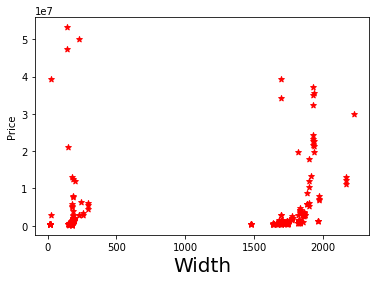

In [ ]:
plt.xlabel('Width',fontsize=20)
plt.ylabel('Price',fontsize=10)
plt.scatter(df.Width,df.Price,color='red',marker='*')

In [ ]:
df_removed_outlier[(df_removed_outlier.Width>1500)&(df_removed_outlier.Width<2100)]

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers,zscore
31,55,55.0,Tata,Tiago,520000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,"2 Years / 75, KM (whichever is earlier)",Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147
32,56,56.0,Tata,Tiago,570000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,"2 Years / 75, KM (whichever is earlier)",Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147
33,57,57.0,Tata,Tiago,599000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,"2 Years / 75, KM (whichever is earlier)",Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147
34,58,58.0,Tata,Tiago,610000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,"2 Years / 75, KM (whichever is earlier)",Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147
43,87,87.0,Toyota,Etios Liva,520300,4.0,BS IV,Petrol,45.0,151.0,1695.0,5.0,15,Ventilated Disc,Drum,MacPherson Strut,Torsion Beam,Electric Power,All Windows,NO,Remote,8PS@56rpm,14Nm@31rpm,5.0,Not on offer,3 years /1 Kms (years/distance whichever comes...,NO,Front,4.8 meter,NO,NO,Yes,NO,NO,NO,NO,0.548101
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1266,127.0,Honda,City,1065900,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Remote,1PS@36rpm,2Nm@175rpm,5.0,CD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,-1.395111
448,1267,1271.0,Honda,City,1182000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,-1.395111
449,1268,1272.0,Honda,City,1312000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Rear sensors with camera,NO,Yes,Yes,-1.395111
450,1269,1273.0,Honda,City,1111000,4.0,BS 6,Diesel,4.0,1495.0,1695.0,4.0,18,Ventilated Disc,Drum,"McPherson strut,coil spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,119PS@66rpm,145Nm@46rpm,5.0,DVD 

In [ ]:
df_removed_outlier=df_removed_outlier[(df_removed_outlier.Width>1500)]

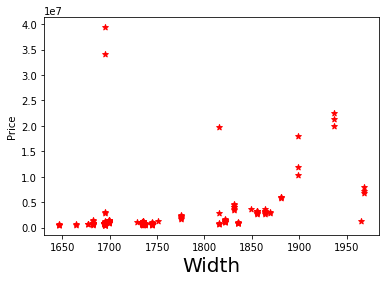

In [ ]:
plt.xlabel('Width',fontsize=20)
plt.ylabel('Price',fontsize=10)
plt.scatter(df_removed_outlier.Width,df_removed_outlier.Price,color='red',marker='*')

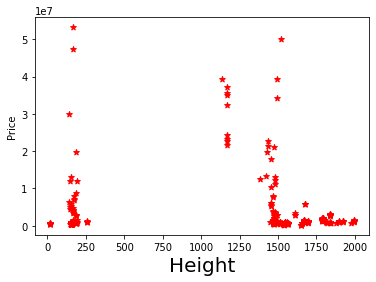

In [ ]:
plt.xlabel('Height',fontsize=20)
plt.ylabel('Price',fontsize=10)
plt.scatter(df.Height,df.Price,color='red',marker='*')

In [ ]:
df_removed_outlier[(df_removed_outlier.Height>1100)]

,Unnamed: 0,ID,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers,zscore
31,55,55.0,Tata,Tiago,520000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,"2 Years / 75, KM (whichever is earlier)",Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147
32,56,56.0,Tata,Tiago,570000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,"2 Years / 75, KM (whichever is earlier)",Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147
33,57,57.0,Tata,Tiago,599000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,"2 Years / 75, KM (whichever is earlier)",Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147
34,58,58.0,Tata,Tiago,610000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,"2 Years / 75, KM (whichever is earlier)",Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147
60,105,15.0,Tata,Bolt,661111,4.0,BS IV,Diesel,44.0,1562.0,1695.0,5.0,22,Solid Disc,Drum,Dual-path McPherson strut with coil spring and...,Twist Beam with Coil spring and Shock Absorber,Electric Power,NO,NO,NO,75PS@4rpm,19Nm@175-3rpm,5.0,Not on offer,2 years /75 Kms (years/distance whichever come...,Yes,Front,5.1 meter,NO,NO,NO,NO,NO,NO,NO,0.500706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
447,1266,127.0,Honda,City,1065900,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Remote,1PS@36rpm,2Nm@175rpm,5.0,CD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,-1.395111
448,1267,1271.0,Honda,City,1182000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,-1.395111
449,1268,1272.0,Honda,City,1312000,4.0,BS IV,Petrol,4.0,1495.0,1695.0,4.0,22,Ventilated Disc,Drum,"McPherson Strut, Coil Spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows,NO,Smart Key,1PS@36rpm,2Nm@175rpm,5.0,DVD Player with USB & Aux-in,"2 Years / 4, Kms (Whichever comes earlier)",Yes,Front & Rear,5.3 meter,NO,NO,Yes,Rear sensors with camera,NO,Yes,Yes,-1.395111
450,1269,1273.0,Honda,City,1111000,4.0,BS 6,Diesel,4.0,1495.0,1695.0,4.0,18,Ventilated Disc,Drum,"McPherson strut,coil spring","Torsion Beam Axle, Coil Spring",Electric Power,All Windows

In [ ]:
df_removed_outlier=df_removed_outlier[(df_removed_outlier.Height>1100)]

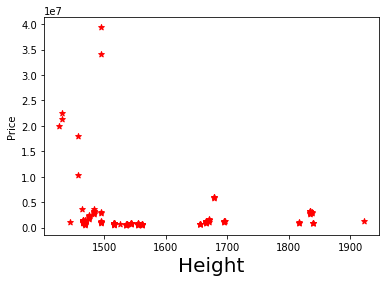

In [ ]:
plt.xlabel('Height',fontsize=20)
plt.ylabel('Price',fontsize=10)
plt.scatter(df_removed_outlier.Height,df_removed_outlier.Price,color='red',marker='*')

In [ ]:
#df_removed_outlier.Minimum_Turning_Radius
df_removed_outlier['Minimum_Turning_Radius']

31     4.9 meter
32     4.9 meter
33     4.9 meter
34     4.9 meter
60     5.1 meter
         ...    
447    5.3 meter
448    5.3 meter
449    5.3 meter
450    5.3 meter
451    5.3 meter
Name: Minimum_Turning_Radius, Length: 153, dtype: object

In [ ]:
df_removed_outlier['Minimum_Turning_Radius'].str.split(' ').str.get(0)

31     4.9
32     4.9
33     4.9
34     4.9
60     5.1
      ... 
447    5.3
448    5.3
449    5.3
450    5.3
451    5.3
Name: Minimum_Turning_Radius, Length: 153, dtype: object

In [ ]:
df_removed_outlier['Minimum_Turning_Radius']=df_removed_outlier['Minimum_Turning_Radius'].str.split(' ').str.get(0)

In [ ]:
df.isnull().sum()*100/df.shape[0]


Unnamed: 0                        0.0
ID                                0.0
Make                              0.0
Model                             0.0
Price                             0.0
Valves_Per_Cylinder               0.0
Emission_Norm                     0.0
Fuel_Type                         0.0
Fuel_Tank_Capacity                0.0
Height                            0.0
Width                             0.0
Doors                             0.0
City_Mileage                      0.0
Front_Brakes                      0.0
Rear_Brakes                       0.0
Front_Suspension                  0.0
Rear_Suspension                   0.0
Power_Steering                    0.0
Power_Windows                     0.0
Power_Seats                       0.0
Keyless_Entry                     0.0
Power                             0.0
Torque                            0.0
Seating_Capacity                  0.0
Audiosystem                       0.0
Basic_Warranty                    0.0
Central_Lock

In [ ]:
df_removed_outlier.head(4)

,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers,zscore
31,Tata,Tiago,520000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,2,Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147
32,Tata,Tiago,570000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,2,Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147
33,Tata,Tiago,599000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,2,Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147
34,Tata,Tiago,610000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,2,Yes,Front,4.9 meter,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,0.074147


In [ ]:
#for Model Buildinf
df_removed_outlier.to_csv("2.2_car_procesed.csv")

In [ ]:
#load data
from google.colab import files
uploaded = files.upload()

Saving 2.2_car_procesed.csv to 2.2_car_procesed (1).csv


In [ ]:
data= pd.read_csv('2.2_car_procesed.csv')
data.head(1)

,Unnamed: 0,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers
0,31,Tata,Tiago,520000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,2,Yes,Front,4.9,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO


In [ ]:
data.Fuel_Type.value_counts()

Diesel      78
Petrol      73
CNG          1
Electric     1
Name: Fuel_Type, dtype: int64

In [ ]:
data.Emission_Norm.value_counts()

BS IV    140
BS 6      13
Name: Emission_Norm, dtype: int64

In [ ]:
data.Power_Windows.value_counts()

All Windows           142
Only Front Windows      6
NO                      5
Name: Power_Windows, dtype: int64

In [ ]:
#Rain_Sensing_Wipers
data.Rain_Sensing_Wipers.value_counts()

NO     117
Yes     36
Name: Rain_Sensing_Wipers, dtype: int64

In [ ]:
#Navigation_System
data.Navigation_System.value_counts()

NO     93
Yes    60
Name: Navigation_System, dtype: int64

In [ ]:
#Parking_Assistance
data.Parking_Assistance.value_counts()

Rear sensors with camera                    44
NO                                          43
Rear sensors                                32
Front and rear sensors with camera          26
Front sensors, Rear sensors                  2
Yes                                          2
Front & rear sensors with 36 degree view     2
Rear sensors, Front sensors                  1
Rear sensors, Rear sensors with camera       1
Name: Parking_Assistance, dtype: int64

In [ ]:
#Voice_Recognition
data.Voice_Recognition.value_counts()

NO     145
Yes      8
Name: Voice_Recognition, dtype: int64

In [ ]:
#Drive_Modes
data.Drive_Modes.value_counts()

NO            146
Normal          6
Eco, Sport      1
Name: Drive_Modes, dtype: int64

In [ ]:
#Front_Brakes
data.Front_Brakes.value_counts()

Ventilated Disc    146
Solid Disc           7
Name: Front_Brakes, dtype: int64

In [ ]:
#Power_Seats
data.Power_Seats.value_counts()

NO                  129
Yes                  19
Yes, with memory      4
Power seats           1
Name: Power_Seats, dtype: int64

In [ ]:
#Cup_Holders
data.Cup_Holders.value_counts()

Front & Rear    94
Front           55
Centre           3
NO               1
Name: Cup_Holders, dtype: int64

In [ ]:
#Audiosystem
data.Audiosystem.value_counts()

CD Player with USB & Aux-in            60
CD/MP3/DVD Player with USB & Aux-in    39
Not on offer                           20
NO                                     17
DVD Player with USB & Aux-in           11
USB & Aux-in                            6
Name: Audiosystem, dtype: int64

In [ ]:
#Central_Locking
data.Central_Locking.value_counts()

Yes    148
NO       5
Name: Central_Locking, dtype: int64

**Dummy**

In [ ]:
data.head(2)

,Unnamed: 0,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers
0,31,Tata,Tiago,520000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,2,Yes,Front,4.9,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO
1,32,Tata,Tiago,570000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,2,Yes,Front,4.9,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO


In [ ]:
data['Car_name']=data.Make.str.cat(data.Model)

In [ ]:
df1.head(2)

,BS 6,BS IV
0,1,0
1,1,0


In [ ]:
data=pd.concat([df1,data],axis=1)

In [ ]:
df1=pd.get_dummies(data['Car_name'])

In [ ]:
df1=pd.get_dummies(data['Emission_Norm'])

In [ ]:
df1=pd.get_dummies(data['Fuel_Type'])

In [ ]:
df1=pd.get_dummies(data['Front_Brakes'])

In [ ]:
data.rename({'Solid Disc':'Front_Solid_Disc','Ventilated Disc':'Front_Ventilated_Disc'},axis=1,inplace=True)

In [ ]:
df1=pd.get_dummies(data['Rear_Brakes'])

In [ ]:
data.rename({'Solid Disc':'Rear_Solid_Disc','Ventilated Disc':'Rear_Ventilated_Disc','Drum':'Rear_\Drum'},axis=1,inplace=True)

In [ ]:
#Power_Windows
df1=pd.get_dummies(data['Power_Windows'])

In [ ]:
#Removing No 
data.drop('NO',axis=1,inplace=True)

In [ ]:
data.rename({'All Windows':'Power_Windows_All_Windows','Only Front Windows':'Power_Windows_Only Front Windows'},axis=1,inplace=True)

In [ ]:
#Rain_Sensing_Wipers
df1=pd.get_dummies(data['Rain_Sensing_Wipers'])

In [ ]:
#Removing No 
data.drop('NO',axis=1,inplace=True)

In [ ]:
data.rename({'Yes':'Rain_Sensing_Wipers1'},axis=1,inplace=True)

In [ ]:
data.rename({'Yes':'Navigation_System1'},axis=1,inplace=True)

In [ ]:
#Parking_Assistance
df1=pd.get_dummies(data['Parking_Assistance'])

In [ ]:
#Voice_Recognition
df1=pd.get_dummies(data['Voice_Recognition'])

In [ ]:
data.rename({'Yes':'Voice_Recognition1'},axis=1,inplace=True)

In [ ]:
#Drive_Modes
df1=pd.get_dummies(data['Drive_Modes'])

In [ ]:
#Normal
data.rename({'Normal':'Drive_Mode_Normal','Eco, Sport':'Drive_Mode_Sport'},axis=1,inplace=True)

In [ ]:
#Cup_Holders
df1=pd.get_dummies(data['Cup_Holders'])

In [ ]:
#Centre
data.rename({'Centre':'Cup_Holders_Centre','Front & Rear':'Cup_Holders_Front&Rear','Front':'Cup_Holders_Front'},axis=1,inplace=True)

In [ ]:
#Audiosystem
df1=pd.get_dummies(data['Audiosystem'])

In [ ]:
data=pd.concat([df1,data],axis=1)

In [ ]:
data.head(1)

,CD Player with USB & Aux-in,CD/MP3/DVD Player with USB & Aux-in,DVD Player with USB & Aux-in,NO,Not on offer,USB & Aux-in,CD Player with USB & Aux-in,CD/MP3/DVD Player with USB & Aux-in,DVD Player with USB & Aux-in,NO,Not on offer,USB & Aux-in,Cup_Holders_Centre,Cup_Holders_Front,Cup_Holders_Front&Rear,NO,Drive_Mode_Sport,NO,Drive_Mode_Normal,NO,Voice_Recognition1,Front & rear sensors with 36 degree view,Front and rear sensors with camera,"Front sensors, Rear sensors",NO,Rear sensors,Rear sensors with camera,"Rear sensors, Front sensors","Rear sensors, Rear sensors with camera",Voice_Recognition1,NO,Navigation_System1,Rain_Sensing_Wipers1,Rain_Sensing_Wipers,All Windows,Only Front Windows,Power_Windows_All_Windows,Power_Windows_Only Front Windows,Power_Windows_All_Windows,Power_Windows_Only Front Windows,...,ToyotaEtios Cross,ToyotaFortuner,VolkswagenPolo,VolkswagenVento,Unnamed: 0,Make,Model,Price,Valves_Per_Cylinder,Emission_Norm,Fuel_Type,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Front_Brakes,Rear_Brakes,Front_Suspension,Rear_Suspension,Power_Steering,Power_Windows,Power_Seats,Keyless_Entry,Power,Torque,Seating_Capacity,Audiosystem,Basic_Warranty,Central_Locking,Cup_Holders,Minimum_Turning_Radius,Drive_Modes,Voice_Recognition,ABS_(Anti-lock_Braking_System),Parking_Assistance,EBA_(Electronic_Brake_Assist),Navigation_System,Rain_Sensing_Wipers,Car_name
0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,...,0,0,0,0,31,Tata,Tiago,520000,4.0,BS 6,Petrol,35.0,1535.0,1647.0,5.0,23,Ventilated Disc,Drum,"Independent, Lower Wishbone, Mcpherson Strut w...",Semi-Independent; Twist beam with dual path strut,Electric Power,All Windows,NO,Remote,86PS@6rpm,114NM@33rpm,5.0,CD Player with USB & Aux-in,2,Yes,Front,4.9,NO,NO,Yes,Front and rear sensors with camera,NO,Yes,NO,TataTiago


In [ ]:
#Central_Locking
df1=pd.get_dummies(data['Central_Locking'])

In [ ]:
data.rename({'Yes':'Central_Locking'},axis=1,inplace=True)

In [ ]:
#Power_Steering
df1=pd.get_dummies(data['Power_Steering'])

In [ ]:
data.rename({'Hydraulic Power':'Power_Steering_Hydraulic_Power','Electro-Hydraulic':'Power_Steering_Electro_Hydraulic','Electric Power':'Power_Steering_Electric_Power','Yes':'Power_Steering'},axis=1,inplace=True)

In [ ]:
#ABS_(Anti-lock_Braking_System)
df1=pd.get_dummies(data['ABS_(Anti-lock_Braking_System)'])

In [ ]:
data.rename({'Yes':'Anti-lock_Braking_System'},axis=1,inplace=True)

In [ ]:
#EBA_(Electronic_Brake_Assist)
df1=pd.get_dummies(data['EBA_(Electronic_Brake_Assist)'])

In [ ]:
data.rename({'Yes':'Electronic_Brake_Assist'},axis=1,inplace=True)

In [303]:
data.head(1)

,Electronic_Brake_Assist1,Anti-lock_Braking_System1,Power_Steering_Electric_Power,Power_Steering_Electro_Hydraulic,Power_Steering_Hydraulic_Power,Central_Locking1,Cup_Holders_Centre,Cup_Holders_Front,Cup_Holders_Front&Rear,Drive_Mode_Sport,Drive_Mode_Normal,Voice_Recognition1,Front & rear sensors with 36 degree view,Front and rear sensors with camera,"Front sensors, Rear sensors",Rear sensors,Rear sensors with camera,"Rear sensors, Front sensors","Rear sensors, Rear sensors with camera",Voice_Recognition1,Navigation_System1,Rain_Sensing_Wipers1,All Windows,Only Front Windows,Power_Windows_All_Windows,Power_Windows_Only Front Windows,Power_Windows_All_Windows,Power_Windows_Only Front Windows,Rear_\Drum,Rear_Solid_Disc,Rear_Ventilated_Disc,Front_Solid_Disc,Front_Ventilated_Disc,CNG,Diesel,Electric,Petrol,BS 6,BS IV,BmwX3,...,HondaAccord Hybrid,HondaBrv,HondaCity,HondaJazz,HyundaiVerna,JaguarXj,MahindraKuv1 Nxt,MahindraTuv3,Maruti SuzukiDzire,Maruti SuzukiDzire Tour,NissanMicra,NissanSunny,NissanTerrano,PorschePanamera,RenaultDuster,RenaultLodgy,SkodaKodiaq,SkodaMonte Carlo,SkodaRapid,SkodaSuperb,SkodaSuperb Sportline,TataBolt,TataSafari Storme,TataTiago,TataTigor,ToyotaCorolla Altis,ToyotaEtios Cross,ToyotaFortuner,VolkswagenPolo,VolkswagenVento,Price,Valves_Per_Cylinder,Fuel_Tank_Capacity,Height,Width,Doors,City_Mileage,Seating_Capacity,Basic_Warranty,Minimum_Turning_Radius
0,0,1,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,520000,4.0,35.0,1535.0,1647.0,5.0,23,5.0,2,4.9


In [302]:

data.drop('Car_name',axis=1,inplace=True)

In [ ]:
data.drop('Power_Steering',axis=1,inplace=True)
data.drop('Central_Locking',axis=1,inplace=True)
data.drop('Rain_Sensing_Wipers',axis=1,inplace=True)
data.drop('EBA_(Electronic_Brake_Assist)',axis=1,inplace=True)
data.drop('ABS_(Anti-lock_Braking_System)',axis=1,inplace=True)
data.drop('Yes',axis=1,inplace=True)
data.drop('NO',axis=1,inplace=True)


In [ ]:
#data.drop('Solid Disc',axis=1,inplace=True)
#data.drop('Ventilated Disc',axis=1,inplace=True)
data.drop('Navigation_System',axis=1,inplace=True)
data.drop('Parking_Assistance',axis=1,inplace=True)
data.drop('Voice_Recognition',axis=1,inplace=True)
data.drop('Drive_Modes',axis=1,inplace=True)
data.drop('Cup_Holders',axis=1,inplace=True)



data.drop('Unnamed: 0',axis=1,inplace=True)
data.drop('Make',axis=1,inplace=True)
data.drop('Model',axis=1,inplace=True)
data.drop('Emission_Norm',axis=1,inplace=True)
data.drop('Fuel_Type',axis=1,inplace=True)
data.drop('Front_Brakes',axis=1,inplace=True)
data.drop('Rear_Brakes',axis=1,inplace=True)
data.drop('Front_Suspension',axis=1,inplace=True)
data.drop('Rear_Suspension',axis=1,inplace=True)
data.drop('Power_Windows',axis=1,inplace=True)
data.drop('Power_Seats',axis=1,inplace=True)
data.drop('Keyless_Entry',axis=1,inplace=True)
data.drop('Power',axis=1,inplace=True)
data.drop('Torque',axis=1,inplace=True)
data.drop('Audiosystem',axis=1,inplace=True)



In [ ]:
df1=pd.get_dummies(data['Power_Steering'])
df1=pd.get_dummies(data['Power_Windows'])
df1=pd.get_dummies(data['Power_Seats'])
df1=pd.get_dummies(data['Keyless_Entry'])
df1=pd.get_dummies(data['Central_Locking'])
df1=pd.get_dummies(data['Cup_Holders'])
df1=pd.get_dummies(data['Drive_Modes'])
df1=pd.get_dummies(data['Voice_Recognition'])
df1=pd.get_dummies(data['EBA_(Electronic_Brake_Assist)'])
df1=pd.get_dummies(data['ABS_(Anti-lock_Braking_System)'])
df1=pd.get_dummies(data['Navigation_System'])
df1=pd.get_dummies(data['Rain_Sensing_Wipers'])

In [306]:
#for Model Regretion
data.to_csv("4_Categorical_data.csv")